In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree

In [2]:
data= pd.read_csv('/content/daily_weather.csv')

In [3]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [4]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [5]:
data.shape

(1095, 11)

In [6]:
data.isnull().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [7]:
data[data.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


##Data Cleaning & Feature Engineering

In [8]:
del data['number']

In [9]:
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [10]:
data=data.dropna()

In [11]:
data.shape

(1064, 10)

In [12]:
#adiing new column as a target column
clean_data=data.copy()

#defining high humidity as relative_humidity>28 at 3 pm
clean_data['high_humidity']=(clean_data['relative_humidity_3pm'] >28)* 1
clean_data['high_humidity'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity, dtype: int64

In [13]:
y=clean_data[['high_humidity']].copy()

In [14]:
y

,high_humidity
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


In [15]:

morning_features= ['air_pressure_9am',	'air_temp_9am',	'avg_wind_direction_9am',	'avg_wind_speed_9am',	'max_wind_direction_9am',	'max_wind_speed_9am',	'rain_accumulation_9am',	'rain_duration_9am'	,'relative_humidity_9am']

In [16]:
X=clean_data[morning_features].copy()

In [17]:
X

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000
...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000


In [18]:
X.columns


Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [19]:
y.columns

Index(['high_humidity'], dtype='object')

#Splitting the data set

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=24)

In [22]:
model=DecisionTreeClassifier(criterion= 'entropy', max_leaf_nodes=10, random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [23]:
#checking accuracy of training data
y_pred_train=model.predict(X_train)
pd.Series(y_pred_train).value_counts()

0    390
1    322
dtype: int64

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
metrics.accuracy_score(y_pred_train,y_train)

0.9087078651685393

In [26]:
#checking accuracy of testing data
y_pred_test=model.predict(X_test)
pd.Series(y_pred_test).value_counts()

0    200
1    152
dtype: int64

In [28]:
metrics.accuracy_score(y_pred_test,y_test)*100

87.7840909090909

In [29]:
confusion_matrix(y_test,y_pred_test)

array([[176,  19],
       [ 24, 133]])

In [30]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       195
           1       0.88      0.85      0.86       157

    accuracy                           0.88       352
   macro avg       0.88      0.87      0.88       352
weighted avg       0.88      0.88      0.88       352



In [43]:
from sklearn import tree

[Text(0.5666666666666667, 0.9, 'x[8] <= 30.443\nentropy = 0.998\nsamples = 712\nvalue = [373, 339]'),
 Text(0.26666666666666666, 0.7, 'x[0] <= 919.175\nentropy = 0.652\nsamples = 430\nvalue = [358, 72]'),
 Text(0.13333333333333333, 0.5, 'x[8] <= 20.905\nentropy = 0.964\nsamples = 162\nvalue = [99, 63]'),
 Text(0.06666666666666667, 0.3, 'entropy = 0.76\nsamples = 91\nvalue = [71, 20]'),
 Text(0.2, 0.3, 'x[0] <= 917.339\nentropy = 0.968\nsamples = 71\nvalue = [28, 43]'),
 Text(0.13333333333333333, 0.1, 'entropy = 0.769\nsamples = 40\nvalue = [9, 31]'),
 Text(0.26666666666666666, 0.1, 'entropy = 0.963\nsamples = 31\nvalue = [19, 12]'),
 Text(0.4, 0.5, 'x[8] <= 20.08\nentropy = 0.212\nsamples = 268\nvalue = [259, 9]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.073\nsamples = 226\nvalue = [224, 2]'),
 Text(0.4666666666666667, 0.3, 'x[0] <= 920.036\nentropy = 0.65\nsamples = 42\nvalue = [35, 7]'),
 Text(0.4, 0.1, 'entropy = 1.0\nsamples = 12\nvalue = [6, 6]'),
 Text(0.5333333333333333, 0.1

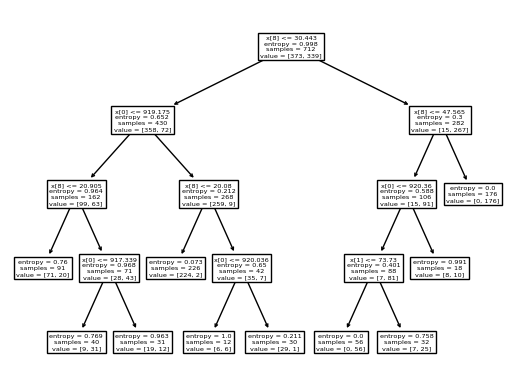

In [44]:
tree.plot_tree(model)

In [36]:
model1=DecisionTreeClassifier(criterion= 'gini',max_leaf_nodes=10, random_state=0)
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [37]:
#checking accuracy of training data
y_pred_train1=model1.predict(X_train)
pd.Series(y_pred_train1).value_counts()

0    391
1    321
dtype: int64

In [38]:
metrics.accuracy_score(y_pred_train1,y_train)

0.9185393258426966

In [39]:
#checking accuracy of testing data
y_pred_test1=model1.predict(X_test)
pd.Series(y_pred_test1).value_counts()

0    198
1    154
dtype: int64

In [40]:
metrics.accuracy_score(y_pred_test1,y_test)*100

90.625

In [41]:
confusion_matrix(y_test,y_pred_test1)

array([[180,  15],
       [ 18, 139]])

In [42]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       195
           1       0.90      0.89      0.89       157

    accuracy                           0.91       352
   macro avg       0.91      0.90      0.90       352
weighted avg       0.91      0.91      0.91       352



[Text(0.640625, 0.9166666666666666, 'x[8] <= 25.884\ngini = 0.499\nsamples = 712\nvalue = [373, 339]'),
 Text(0.40625, 0.75, 'x[0] <= 918.823\ngini = 0.218\nsamples = 385\nvalue = [337, 48]'),
 Text(0.25, 0.5833333333333334, 'x[8] <= 20.905\ngini = 0.443\nsamples = 118\nvalue = [79, 39]'),
 Text(0.125, 0.4166666666666667, 'x[4] <= 167.043\ngini = 0.35\nsamples = 84\nvalue = [65, 19]'),
 Text(0.0625, 0.25, 'gini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.1875, 0.25, 'gini = 0.472\nsamples = 42\nvalue = [26, 16]'),
 Text(0.375, 0.4166666666666667, 'x[0] <= 917.284\ngini = 0.484\nsamples = 34\nvalue = [14, 20]'),
 Text(0.3125, 0.25, 'x[2] <= 199.919\ngini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.4375, 0.25, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.5625, 0.5833333333333334, 'x[1] <= 86.576\ngini = 0.065

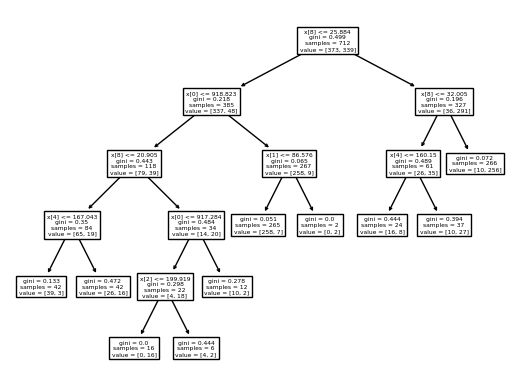

In [45]:
tree.plot_tree(model1)